# 1. Install Dependencies and Setup

In [1]:
%pip install tensorflow opencv-python matplotlib

  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip list

Package                                Version
-------------------------------------- ------------
a2wsgi                                 1.10.4
absl-py                                2.1.0
aiohttp                                3.8.5
aiosignal                              1.3.1
alembic                                1.12.0
altair                                 5.3.0
anyio                                  4.0.0
apache-airflow                         2.7.0
apache-airflow-providers-common-sql    1.7.1
apache-airflow-providers-ftp           3.5.1
apache-airflow-providers-http          4.5.1
apache-airflow-providers-imap          3.3.1
apache-airflow-providers-sqlite        3.4.3
apispec                                6.3.0
argcomplete                            3.1.1
asgiref                                3.7.2
asttokens                              2.0.5
astunparse                             1.6.3
async-timeout                          4.0.3
attrs                                  23.1.

In [2]:
import tensorflow as tf
import os  #to go to the path eg -

# os.path.join('data', 'happy') this line of code will output as - data\\happy

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data_dir = 'data' 

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['-white-background-excited-bearded-guy-happy-face-emotion-very-much-118732502.jpg',
 '1000_F_142645226_u2th2YE2pgSUP5vQpuatIq2TO8BXZh3J.jpg',
 '1000_F_267995900_qg8jfTCHvCijDkXC5HOlPBK0pZ0i0dlh.jpg',
 '1000_F_296248886_PwFenL6eBELzYVMO7GPmrulC1T3Qv2yA.jpg',
 '160-1600378_transparent-happy-person-png-happy-man-face-png.png',
 '1687d86811a2c25b877448ed47218131.jpg',
 '1920_face-new-675956.jpg',
 '19eedf58c6a884eaec995907d3b4fe95.jpg',
 '201310-orig-happy-work-3-949x534.jpg',
 '24-244483_happy-face-people-png-transparent-png.png',
 '292115365.jpg',
 '318978451.jpg',
 '360_F_122335513_GB4jSOLOix2BTYODKet4qWJH7AEaEszL.jpg',
 '360_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg',
 '3ecfa095e8c327a1b060634f8674c5d1.jpg',
 '402825008.jpg',
 '5-happy-girls-share-the-secrets-to-always-having-a-smile-on-their-faces-vogue-india-1366x768.jpg',
 '538692449_cb1853bb50.jpg',
 '59097182-people-female-business-and-portrait-concept-happy-smiling-young-woman-face.jpg',
 '6-Habits-Of-Happy-People.jpg',
 

In [191]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [192]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\68132555-smiling-faces-happy-group-of-multiethnic-people-men-and-women.jpg
Image not in ext list data\happy\casual-portrait-in-positive-view-big-smile-beautiful-model-posing-1554086789.jpg
Image not in ext list data\happy\depositphotos_374111884-stock-photo-cute-happy-face-close-face.jpg
Image not in ext list data\happy\depositphotos_405807546-stock-photo-happy-man-smile-face-handsome.jpg
Image not in ext list data\happy\handsome-unshaven-young-darkskinned-male-260nw-640011838.jpg
Image not in ext list data\happy\happy-home.jpg
Image not in ext list data\happy\ng-her-red-hair-in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg


# 3. Load Data

In [193]:
import numpy as np
from matplotlib import pyplot as plt

In [194]:
data = tf.keras.utils.image_dataset_from_directory('data')  #building our datapipeline

Found 275 files belonging to 2 classes.


The above is a methode to create a dataset from our data and this methode performs the below transformations to the data 

In [195]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [196]:
data_iterator = data.as_numpy_iterator()  # A way to access our data pipeline

In [197]:
batch = data_iterator.next()

In [198]:
#images represented as numpy arrarys
batch[0].shape  # index 0 means the columns of images

(32, 256, 256, 3)

In [199]:
batch[1]  # index 1 means the columns of labels

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

class 0 - happy 
class 1 - sad

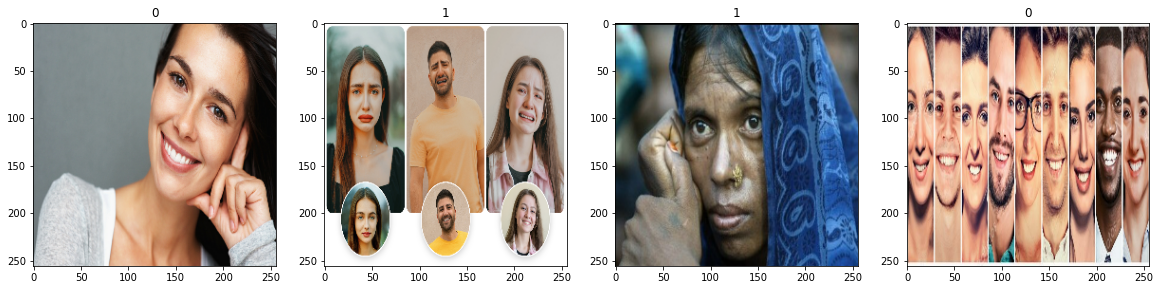

In [200]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [201]:
def normalize_image(image, label):
    # Convert image to float32
    image = tf.cast(image, tf.float32)

    # Find the minimum and maximum values of the image
    min_val = tf.reduce_min(image)
    max_val = tf.reduce_max(image)

    # Apply min-max normalization to scale image to [0, 1]
    image = (image - min_val) / (max_val - min_val)

    return image, label


data = data.map(normalize_image)

In [232]:
data.as_numpy_iterator().next()

(array([[[[0.32433364, 0.26943168, 0.25766698],
          [0.3479118 , 0.29300985, 0.28124514],
          [0.3725333 , 0.31763133, 0.30586663],
          ...,
          [0.94496864, 0.97471744, 0.9967912 ],
          [0.90658903, 0.94718343, 0.982018  ],
          [0.8879672 , 0.9389476 , 0.97032017]],
 
         [[0.3685432 , 0.31364125, 0.30187654],
          [0.38734758, 0.33244562, 0.32068092],
          [0.40698403, 0.35028854, 0.33852383],
          ...,
          [0.9482638 , 0.9780126 , 0.995735  ],
          [0.89939183, 0.93998617, 0.97482073],
          [0.8672871 , 0.9182675 , 0.94964004]],
 
         [[0.38039216, 0.3254902 , 0.3137255 ],
          [0.39114332, 0.33624136, 0.32447666],
          [0.40535942, 0.34730184, 0.33553714],
          ...,
          [0.93896365, 0.96943796, 0.98960006],
          [0.8724404 , 0.91631424, 0.94131047],
          [0.8179611 , 0.8689415 , 0.90031403]],
 
         ...,
 
         [[0.597932  , 0.28069854, 0.2685202 ],
          [0.57461

In the above the image value is converted and scalled between 0 and 1.

# 5. Split Data

In [238]:
len(data) # output is 6 which means we have 6 batches of data in our dataset pipeline

9

In [240]:
train_size = int(len(data)*.7) #70% of whole data
val_size = int(len(data)*.2)+1  #20% of whole data
test_size = int(len(data)*.1)+1  #10% of whole data

In [241]:
train_size+val_size+test_size == len(data)  #output is True

True

In [242]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [243]:
len(train), len(val), len(test)

(6, 2, 1)

# 6. Build Deep Learning Model

In [244]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [246]:
model = Sequential()

In [247]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [249]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [250]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [251]:
logdir='logs'

In [252]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [253]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 3s 312ms/step - loss: 1.3690 - accuracy: 0.3906 - val_loss: 0.6836 - val_accuracy: 0.6406
Epoch 2/20
6/6 [==============================] - 2s 298ms/step - loss: 0.6429 - accuracy: 0.6458 - val_loss: 0.6322 - val_accuracy: 0.5938
Epoch 3/20
6/6 [==============================] - 2s 294ms/step - loss: 0.6155 - accuracy: 0.6458 - val_loss: 0.5805 - val_accuracy: 0.6719
Epoch 4/20
6/6 [==============================] - 2s 290ms/step - loss: 0.5691 - accuracy: 0.7083 - val_loss: 0.5212 - val_accuracy: 0.7344
Epoch 5/20
6/6 [==============================] - 2s 288ms/step - loss: 0.5273 - accuracy: 0.7396 - val_loss: 0.4509 - val_accuracy: 0.8750
Epoch 6/20
6/6 [==============================] - 2s 289ms/step - loss: 0.4467 - accuracy: 0.8073 - val_loss: 0.5032 - val_accuracy: 0.7031
Epoch 7/20
6/6 [==============================] - 2s 291ms/step - loss: 0.3485 - accuracy: 0.8438 - val_loss: 0.3730 - val_accuracy: 0.7812
Epoch 8/20
6/6 [====

Epoch 20/20
9/9 [==============================] - 4s 389ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 1.0000
Accuracy 100%

# 8. Plot Performance

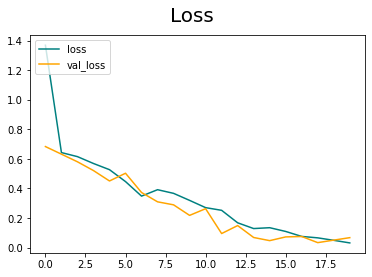

In [254]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

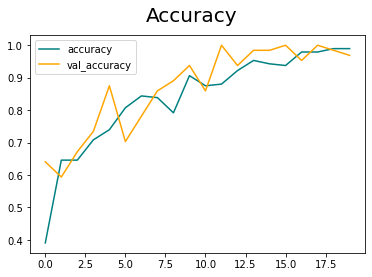

In [255]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [256]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [257]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [258]:
len(test)

1

In [259]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 93ms/step


In [261]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [262]:
import cv2

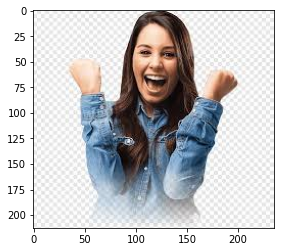

In [309]:
img = cv2.imread("images.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


plt.show()

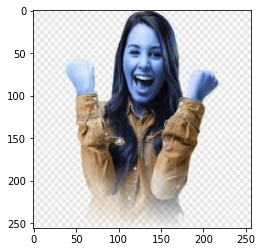

In [324]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [325]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [326]:
yhat

array([[0.22904171]], dtype=float32)

In [313]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')
    

Predicted class is Happy


# 11. Save the Model

In [314]:
from tensorflow.keras.models import load_model

In [319]:
model.save(os.path.join('models','imageclassifier.h5'))

In [322]:
new_model = load_model('models/imageclassifier.h5')

In [323]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 78ms/step


array([[0.22904171]], dtype=float32)